<a href="https://colab.research.google.com/github/dilaraozcerit/NLP/blob/master/NLP_4_(NLP_Application_with_DL)(TR)_30_Mar_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLP with DL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('hepsiburada.csv')

In [3]:
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
df.Rating.value_counts()
# NLP'de missing value doldurma yok. Smote gibi veri arttırma var ama null dolduramıyoruz.

1    229821
0     13676
Name: Rating, dtype: int64

In [6]:
df.Rating = df.Rating.map({1:0, 0:1})

In [7]:
df.Rating.value_counts()
# Datamız çok dengesiz
# Normalde sadece oranlara bakarak bunu söyleyemeyiz ama sayılarına da bakmak lazım.

0    229821
1     13676
Name: Rating, dtype: int64

In [8]:
pd.Series(df.Rating).value_counts(normalize=True)

0    0.943835
1    0.056165
Name: Rating, dtype: float64

## Tokenization

In [9]:
X = df['Review'].values
y = df['Rating'].values

In [12]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

# Deep Learning'de temizlemesek de olur
# num_words defaultu none'dır. Ama best practice, classification 10 bin ve 15 bin tavsiye edilir.
# Biz burda sayıların da kalmasını istedik çünkü bazıları mesela '10 puan' '5 yıldız' falan numarayla yazıyorlar.

In [13]:
tokenizer.fit_on_texts(X)
# içerisine yorumlarımızı array şeklinde verince bu corpusumuzda geçen ilk 15 bin token'i alıyor

## Creating word index

In [14]:
tokenizer.word_index
# Sırasıyla corpusumuzda en fazla kullanılan tokeni 1den başlayarak aşağıya doğru sıralıyor

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [ ]:
len(tokenizer.word_index)
# hafızasında ilk 15 bini kullanacağı bilgisi var hala.

217983

## Converting tokens to numeric

In [15]:
X_num_tokens = tokenizer.texts_to_sequences(X)
# her bir tokeni

In [16]:
X[105]
# 105. yoruma baktık

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [ ]:
print(X_num_tokens[105])
# yukardaki kelimeleri sayısal değerlere dönüştürdü
# ilk 15 bini aldığımız için. Yukarda çok 6. ama burda 5. mesela. Sebebi ilk 15 binde yok yukardaki kelimelerden biri.
# Büyük iht. Logitech.

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


In [ ]:
len(X_num_tokens[105])
# Kaç tokenden oluşuyor onlara bakıyoruz.

22

In [ ]:
len(X_num_tokens[106])

18

In [ ]:
len(X_num_tokens[6150])

88

In [17]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
# her seferinde tokenleri sayıyoruz.
# teker teker her biri için kaç tokenden oluştuğunu saydırıyoruz

## Maximum number of tokens for all documents

In [ ]:
num_tokens.mean()

21.36101060793357

In [ ]:
num_tokens.max()

298

In [ ]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [ ]:
X[21941]

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [ ]:
len(X_num_tokens[21941])

298

In [22]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 10)
print(sum(np.array(list) < 10))
print(sum(np.array(list) < 10)/len(list))
# 10 tokenden 

[ True False  True  True False False]
3
0.5


In [21]:
max_tokens = 61
# her yorumu kaç tokene sabitleyeyim? Bunun için yapıyorum.

In [ ]:
sum(num_tokens < max_tokens) / len(num_tokens)
# Bizim yorumlarımızın 96'sında sıkıntı yok. Sadece 4'ünde değişiklik yapacağız.
# Yani yüzde 4'ünde bilgi kaybımız olacak.
# Johnson hocamız genelde 95 i kullanırmış. Bunu deneye yanıla öğreneceğiz.
# Model çok güçlüyse 98 bile olur ama best practice 95.

0.9598968365113328

In [ ]:
sum(num_tokens < max_tokens)
# Bunlar 61 yorumlardan küçük olanlar. bunlarda bilgi kaybı olmayacak
# Burda tokenler kelimeler oluyor.

233732

Çok güzel bir televizyon --> 4 token var.

In [ ]:
len(num_tokens) # Bu da tüm tokenimiz

243497

## Fixing token counts of all documents (pad_sequences)

Küçültme işleminde rastgele token siliyor.

In [23]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)
# Ben bunu hangi uzunluğa sabitleyeyim? Şuan 61'e sabitliyoruz.

In [24]:
X_pad.shape

(243497, 61)

In [ ]:
np.array(X_num_tokens[800])

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [ ]:
X_pad[800]
# Padding işlemini yapmış 61'den küçük olanlara.

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   19,  341,   52,
        194,   30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,
        164,  479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,
          1,   81,  132,  562,    9,   10], dtype=int32)

In [ ]:
np.array(X_num_tokens[21941])

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [ ]:
X_pad[21941]
# 61'den büyük olanlarda ise son 61'i almış

array([ 872, 3501,  537, 1804,  488, 2218,   75,  163,    2,  456,   13,
       1308, 1865, 3432,    5,  824, 7798,  836, 1640, 7838, 3344,   12,
       1308,   31, 3063,  299, 2704,  851, 1052,   39, 1490, 3436,  317,
       1170,   75,  537,   50,  327,  246, 1322,  120,    2, 3436, 7527,
        199,  260,  579, 6176, 1800,   13,   45,  808,  108,    3,  865,
        749, 5840,   50,  106,   76,  879], dtype=int32)

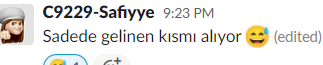

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
# NLP'de önemli olan cümlelerin kendi aralarında sıraları önemli o yüzden machine learning'deki test split'i kullanabiliriz.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)

## Modelling

In [26]:
model = Sequential()

In [27]:
embedding_size = 50
# NLP modeller, özellikle de imbalance datalar overfittinge çok yatkın oluyor. 
# embedding size ile oynarak overfiti giderebiliriz.
# Johnson hcmız birkaç seçenek denemiş ve en iyisini 50'de aldığı için 50'de bırakmış.

In [ ]:
# pip install -U numpy==1.19.5
# Eğer Jupyter'de çalışıyorsak bunu çalıştırmalıymışız.

Geldik en önemli kısımaa !!!

Biz burada 3 boyutlu matrix oluşturacağız.

In [30]:
model.add(Embedding(input_dim=num_words, # input dim corpusumda (en çok) kullanılan corpus? en çok kullanılan ilk 15 bin
                    output_dim=embedding_size, # tokenlerim kaç boyutlu olacak? 50
                    input_length=max_tokens)) # modelime verdiğim textlerin uzunluğu kaç olacak? 61

model.add(Dropout(0.2))

model.add(GRU(units=48, return_sequences=True)) # unit'ler?? time seriesde bunlar nörondu. NLP'de bunlar bizim word embedding'i düşürdüğümüz boyut.
model.add(Dropout(0.2)) # return_sequences layerlar arası bilgi aktarımı için şart.

#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.2))

model.add(GRU(units=12)) 
# Genelde NLP'de RNN modellerinde 5 layer'i geçmeyin diye tavsiye edilir.
# İlk başta biz 3 vermişiz mesela ama sonradan overfiti engellemek için 2'ye indirmişiz.

model.add(Dense(1, activation='sigmoid'))

# Burda batch_norm gerek yok çünkü LSTM ve GRU batch_norm işini yapabiliyor zaten.

Burda GRU yerine LSTM de kullanabiliriz.

Johnson hocamız overfittingi bu değerlerle kurtarmış ama.

In [31]:
optimizer = Adam(learning_rate=0.01)
# Learningle de oynadık overfitting'i engellemek için.

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])
# Biz recall'u takip edeceğiz.
# Binary cross entropy compares each of the predicted probabilities to actual class output which can be either 0 or 1.

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [33]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12

# burda None kısmımız batch_size'ımız.
# Henüz fit uygulamadığımız için none diyor.
# GRU modellerin 3 kapısı vardı, sayıları da yukarda ona göre çarpmışız.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 50)            750000    
                                                                 
 dropout (Dropout)           (None, 61, 50)            0         
                                                                 
 gru (GRU)                   (None, 61, 48)            14400     
                                                                 
 dropout_1 (Dropout)         (None, 61, 48)            0         
                                                                 
 gru_1 (GRU)                 (None, 12)                2232      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
 embedding_1 (Embedding)     (None, 1, 50)             7

 mode'u "auto" olarak bırakmayın. auto trendi takip eder. Ya max ya min yapacağız.
 
 recall, precision >> max

 val_recall, val_loss >> min

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

# in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
# verbose=1 ayrıntı istemedik
# patience küçük tuttuk ki overfite gitmesin
# restore_best_weights=True en yüksek skoru alsın

In [43]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()
# ağırlıklandırma yaptık burda

array([0.52975426, 8.90215702])

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [44]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])
# batch_size aşama aşama artırılabilir. 16, 32, 64, 128, 256....

Epoch 1/10
761/761 [==============================] - 62s 82ms/step - loss: 0.6932 - recall: 0.5404 - val_loss: 0.6892 - val_recall: 0.0000e+00
Epoch 2/10
761/761 [==============================] - 60s 78ms/step - loss: 0.6932 - recall: 0.4393 - val_loss: 0.7215 - val_recall: 1.0000
Epoch 3/10
761/761 [==============================] - 68s 90ms/step - loss: 0.6934 - recall: 0.4996 - val_loss: 0.6855 - val_recall: 0.0000e+00
Epoch 3: early stopping


Diyelim ki bir sürü parametre değiştirdik ama overfiti bir türlü engelleyemedik. O zaman -->> 1 epoch yapacağız

Peki bu loss nedir? 
Diyelim bir sınıfı tahmin ediyoruz. Loss ne kadar 0'a yakın o kadar iyi.  
Özellikle dengesiz data setlerindeki NLP'deki loss = machine learning'deki accuracy gibidir. Bu çok kritik!!!!

Diğer bir problem! NLP'de genelde çok epoch yapmayacağız. Genelde 1 epochle işi halledeceğiz. Genelde Train değerleri daha yüksek olacak ilk epochlarda. MAkalede de bunu anlatıyor. İlk train skorlarımızın yüksek olması normal. Ama ilerde loss ve val_loss değerlerimiz arasında fark olabilir. Biz aşağıdaki tabloya bakarak overfit var mı yok mu anlamıyoruz. Mutlaka train ve test'i karşılaştırmalıyız.

## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.320903,0.859245,0.322289,0.927971
1,0.197325,0.928434,0.181824,0.832541


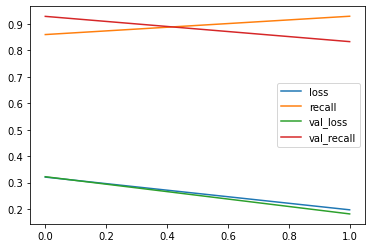

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_train, y_train)
# loss ve val_loss değerlerimiz
# Burda 0.29 ve yukarda 0.32.

6088/6088 [==============================] - 85s 14ms/step - loss: 0.2940 - recall: 0.9679


[0.2940090596675873, 0.9679188132286072]

In [ ]:
model.evaluate(X_test, y_test)

1522/1522 [==============================] - 22s 14ms/step - loss: 0.3223 - recall: 0.9280


[0.3222893178462982, 0.9279707670211792]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

# 1 class'ı için, recall iyi ama precision üzüyor.

[[160497  23359]
 [   351  10590]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    183856
           1       0.31      0.97      0.47     10941

    accuracy                           0.88    194797
   macro avg       0.65      0.92      0.70    194797
weighted avg       0.96      0.88      0.91    194797



In [ ]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))
# overfitting giderilmiş

[[39583  6382]
 [  197  2538]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     45965
           1       0.28      0.93      0.44      2735

    accuracy                           0.86     48700
   macro avg       0.64      0.89      0.68     48700
weighted avg       0.96      0.86      0.90     48700



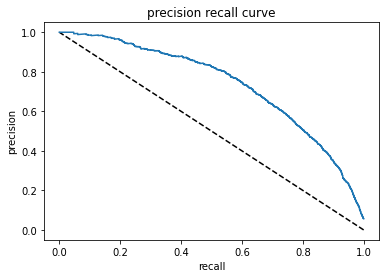

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)
# modelin %73 tahmin başarısı var

0.7356418283772912

##Scores without sample_weight

In [ ]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))
# overfitting var mlsf. Train ve test seti arasında uçurumlar var.

[[182573   1283]
 [  2146   8795]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    183856
           1       0.87      0.80      0.84     10941

    accuracy                           0.98    194797
   macro avg       0.93      0.90      0.91    194797
weighted avg       0.98      0.98      0.98    194797



In [ ]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[45310   655]
 [ 1015  1720]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     45965
           1       0.72      0.63      0.67      2735

    accuracy                           0.97     48700
   macro avg       0.85      0.81      0.83     48700
weighted avg       0.96      0.97      0.96     48700



## Base model without sample weights


model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.5))

model.add(GRU(units=48, return_sequences=True))

model.add(Dropout(0.5))

model.add(GRU(units=12))

model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)


model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])


model.fit(X_train, y_train, epochs=1, batch_size=128,
         validation_data=(X_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[182868    988]
 [  4445   6496]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    183856
           1       0.87      0.59      0.71     10941

    accuracy                           0.97    194797
   macro avg       0.92      0.79      0.85    194797
weighted avg       0.97      0.97      0.97    194797



In [ ]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[45669   296]
 [ 1321  1414]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     45965
           1       0.83      0.52      0.64      2735

    accuracy                           0.97     48700
   macro avg       0.90      0.76      0.81     48700
weighted avg       0.96      0.97      0.96     48700



## Model Saving

In [ ]:
model.save('review_hepsiburada.h5') # deep learning modeli olduğu için h5'le kaydediyoruz.

##Loading Model

In [ ]:
from tensorflow.keras.models import load_model
model_review = load_model('/content/drive/MyDrive/review_hepsiburada.h5')
# modeli bu şekilde kaydediyoruz drive'ımıza ve çağırıyoruz.

## Predicton

In [ ]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews)

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 61)

In [ ]:
(model_review.predict(tokens_pad) >0.5).astype("int")
# bunu integer'a ç

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])